<a href="https://colab.research.google.com/github/ptizzza/HSE_AffectiveComputing/blob/master/MS_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки

In [ ]:
import requests
import json

скопируйте свой ключ

In [ ]:
# set to your own subscription key value
subscription_key = ''
assert subscription_key

скопируйте My Endpoint String (не забудьте /detect в конце)

In [ ]:
# replace <My Endpoint String> with the string from your endpoint URL
face_api_url = 'https://<My Endpoint String>.com/face/v1.0/detect'

здесь вставляем изображение

In [ ]:
image_url = 'https://upload.wikimedia.org/wikipedia/commons/3/37/Dagestani_man_and_woman.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}

здесь выводим нужные параметры

In [ ]:
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

In [ ]:
response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

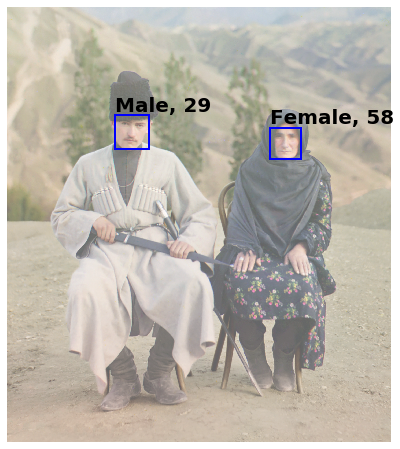

In [ ]:
data = {'url': image_url}
response = requests.post(
    face_api_url, params=params, headers=headers, json=data)
faces = response.json()

# Display the original image and overlay it with the face information.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(8, 8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

In [ ]:
response.json()

[{'faceAttributes': {'accessories': [],
   'age': 29.0,
   'blur': {'blurLevel': 'high', 'value': 0.89},
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.999,
    'sadness': 0.001,
    'surprise': 0.0},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.51},
   'facialHair': {'beard': 0.4, 'moustache': 0.4, 'sideburns': 0.1},
   'gender': 'male',
   'glasses': 'NoGlasses',
   'hair': {'bald': 0.04,
    'hairColor': [{'color': 'black', 'confidence': 0.98},
     {'color': 'brown', 'confidence': 0.87},
     {'color': 'gray', 'confidence': 0.85},
     {'color': 'other', 'confidence': 0.25},
     {'color': 'blond', 'confidence': 0.07},
     {'color': 'red', 'confidence': 0.02}],
    'invisible': False},
   'headPose': {'pitch': -11.4, 'roll': 7.7, 'yaw': 5.3},
   'makeup': {'eyeMakeup': True, 'lipMakeup': False},
   'noise': {'noiseLevel': 'medium', 'value': 0.59},
   'occlusion': {'eyeOccluded': False,
  